<a href="https://colab.research.google.com/github/Zafar-Lab/scDREAMER/blob/main/2109_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import warnings
warnings.filterwarnings('ignore')

import os
os.environ["CUDA_VISIBLE_DEVICES"] = "1" # difference between gpu '0' and '1'

import numpy as np
import tensorflow as tf2
import random
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

import scipy.io
from sklearn.decomposition import PCA
import pdb

import pandas as pd
import scanpy as sc


import scipy.sparse
from sklearn.metrics.cluster import normalized_mutual_info_score as nmi
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from scipy import stats 
from scipy import * 
import datetime 
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

os.getpid()


2023-09-25 11:10:45.647218: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-25 11:10:46.278098: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Instructions for updating:
non-resource variables are not supported in the long term


2513362

In [2]:

np.random.seed(0)
tf.set_random_seed(0)
random.seed(0)
tf2.random.set_seed(0)
tf2.keras.utils.set_random_seed(0)


Building model

In [3]:
name = "Healthy_Heart"

In [4]:

"""
Specify path of the input data here...
"""

data_path = {
"Immune_Human" : "/home/ajita/Documents/data_integration/Immune/Immune_ALL_human.h5ad",
    "Healthy_Heart" : "/home/ajita/Documents/data_integration/Healthy_Heart/Healthy_human_heart_adata.h5ad" 
}


batch_key_dict = {'Immune_Human' : 'batch',
                 'Lung' : 'batch',
                 'Pancreas' : 'tech',
                 'Human_Mouse' : 'batch',
                 'Human_Retina': "Batch",
                 "Healthy_Heart" : "sampleID"
                 
                }
cell_type_key_dict = {'Immune_Human' : 'final_annotation',
                 'Lung' : 'cell_type',  
                 'Pancreas' : 'celltype', 
                 'Human_Mouse' : "celltype", 
                 "Human_Retina":"Subcluster",
                "Healthy_Heart" : "celltype"
                }    


learning_rate = {
                 'Immune_Human' : {"lr_ae" : 0.0002, "lr_dis": 0.0007}, # Small Datasets
                 'Healthy_Heart' : {"lr_ae" : 0.0001, "lr_dis": 0.00001}} # Big Datasets >= 0.5 million cells



2023-09-25 11:10:48.950088: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1635] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 5367 MB memory:  -> device: 0, name: Quadro RTX 5000, pci bus id: 0000:d8:00.0, compute capability: 7.5


Reading data
encoder input shape  Tensor("concat:0", shape=(?, 2147), dtype=float32)
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use `tf.cast` instead.
decoder input shape  Tensor("concat_2:0", shape=(?, 157), dtype=float32)
KL gaussian z Tensor("mul_10:0", shape=(?,), dtype=float32)
KL gaussian l Tensor("mul_9:0", shape=(?,), dtype=float32)
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.

scDREAMER on DataSet /home/ajita/Documents/data_integration/Healthy_Heart/Healthy_human_heart_adata.h5ad ... 


2023-09-25 11:13:15.090570: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:353] MLIR V1 optimization pass is not enabled


Epoch : [0] ,  a_loss = 239.1033
Epoch : [10] ,  a_loss = 184.4793
Epoch : [20] ,  a_loss = 182.6024
Epoch : [30] ,  a_loss = 182.3379
Epoch : [40] ,  a_loss = 181.8184
Epoch : [50] ,  a_loss = 181.2960
Epoch : [60] ,  a_loss = 180.3062
Epoch : [70] ,  a_loss = 178.7656
Epoch : [80] ,  a_loss = 178.4792
Epoch : [90] ,  a_loss = 178.0537
Epoch : [100] ,  a_loss = 178.2020
Epoch : [110] ,  a_loss = 175.9734
Epoch : [120] ,  a_loss = 175.2882
Epoch : [130] ,  a_loss = 173.7362
Epoch : [140] ,  a_loss = 175.9850
Epoch : [150] ,  a_loss = 174.1984
Epoch : [160] ,  a_loss = 175.1758
Epoch : [170] ,  a_loss = 176.2214
Epoch : [180] ,  a_loss = 177.4310
Epoch : [190] ,  a_loss = 180.8067
Epoch : [200] ,  a_loss = 180.3860
Epoch : [210] ,  a_loss = 181.8206
Epoch : [220] ,  a_loss = 180.3470
Epoch : [230] ,  a_loss = 181.2124
Epoch : [240] ,  a_loss = 181.4268
Epoch : [250] ,  a_loss = 181.5593
Epoch : [260] ,  a_loss = 182.2770
Epoch : [270] ,  a_loss = 183.7662
Epoch : [280] ,  a_loss = 184.5

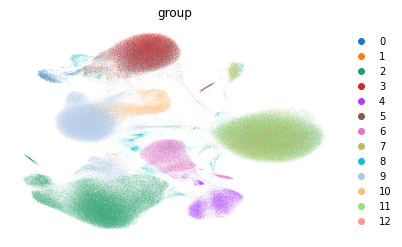

None


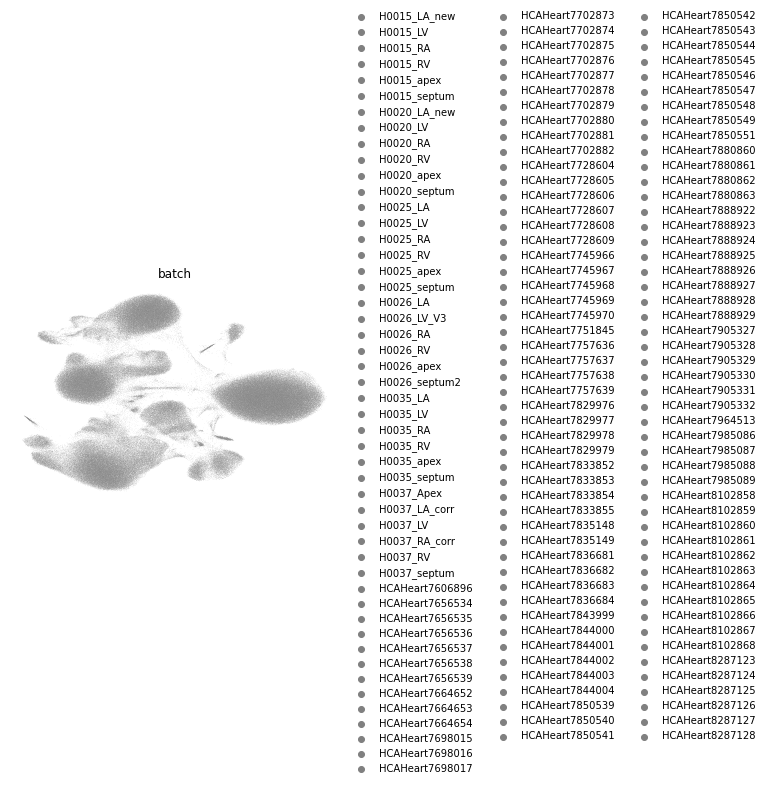

None
Computing NMI ...
Done !
NMI = 0.7415189347503659


In [5]:
from scDREAMER import scDREAMER


run_config = tf.ConfigProto()

run_config.gpu_options.per_process_gpu_memory_fraction = 0.333
run_config.gpu_options.allow_growth = True

with tf.Session(config = run_config) as sess:

    dreamer = scDREAMER(
        sess,
        epoch = 300,
        dataset_name = data_path[name],
        batch = batch_key_dict[name],
        cell_type = cell_type_key_dict[name],
        name = name,
        lr_ae = learning_rate[name]['lr_ae'],
        lr_dis = learning_rate[name]['lr_dis']
        )

    dreamer.train_cluster()

